Web Scraping fact-checker website [PolitiFact](https://www.politifact.com) using **BeautifulSoup** library. 

**Author -** Anshu Kushwah

# Importing Dependencies

In [1]:
from bs4 import BeautifulSoup
import pandas as pd
import requests 
import urllib.request
import time

# Web Scraping using BeautifulSoup

In [2]:
headlines = [] # Stored title of the news 
targets = [] # True/False
for pagenumber in range(1,101): # Web Scraping first 100 pages
  pagenumber = str(pagenumber)
  URL = "https://www.politifact.com/factchecks/list/?page"+pagenumber
  webpage = requests.get(URL)
  soup = BeautifulSoup(webpage.text, "html.parser")
  # Fetching title/headline of news
  text = soup.find_all('div',attrs={'class':'m-statement__quote'})
  for i in text:
    link1 = i.find_all('a')
    headline = link1[0].text.strip()
    headlines.append(headline)

  #  Fetching the target which is weather news is true/false
  target = soup.find_all('div',attrs={'class':'m-statement__meter'})
  for j in target:
    link2 = j.find('div',attrs={'class':'c-image'}).find('img').get('alt')
    targets.append(link2)

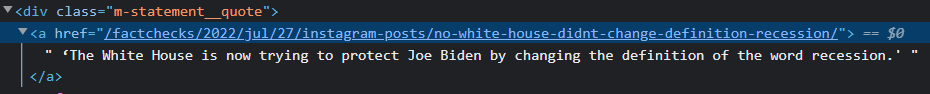

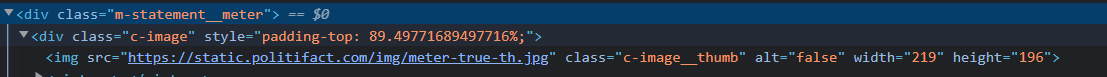

In [3]:
final_headline = []
final_targets = []
for i in range(len(headlines)):
  if(targets[i] == "pants-fire"):
    final_targets.append("false")
    final_headline.append(headlines[i])
  if(targets[i]=="false" or targets[i]=="true"):
    final_targets.append(targets[i])
    final_headline.append(headlines[i])

In [4]:
len(final_headline)

2500

**Headlines extracted -** 2500

# Making DataFrame

In [5]:
data = {'Headline':final_headline,
        'Target':final_targets}
df = pd.DataFrame(data)
df.head()

,Headline,Target
0,You can't pour water on flames from an electri...,false
1,“Know what they always find in Alzheimer’s pat...,false
2,"A cure for cancer, known as a Rife machine, wa...",false
3,Baby carrots are soaked in bleach and can caus...,false
4,"In its July “red alert” for extreme heat, the ...",false


In [6]:
# Saving csv file
df.to_csv("/content/PolitiFact01.csv")

# Initial Anlysis

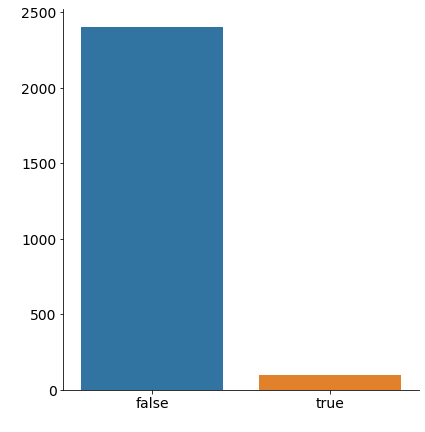

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(14,7))
# barplot
ax1 = plt.subplot(1,2,1)
cp = sns.countplot(x=df["Target"])
ax1.set_xlabel(" ")
ax1.set_ylabel(" ")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
sns.despine(top=True, right=True)

In [8]:
df['Target'].value_counts()

false    2400
true      100
Name: Target, dtype: int64

**Observation -** Data is unbalenced. There are way more False news than True news in dataset. So we need to balance the dataset to make a generalized model.
